<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/Convolutions/Simple_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! wget https://www.kotzendes-einhorn.de/blog/wp-content/uploads/2011/01/lenna.jpg

--2023-05-03 20:49:30--  https://www.kotzendes-einhorn.de/blog/wp-content/uploads/2011/01/lenna.jpg
Resolving www.kotzendes-einhorn.de (www.kotzendes-einhorn.de)... 94.130.145.107
Connecting to www.kotzendes-einhorn.de (www.kotzendes-einhorn.de)|94.130.145.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64098 (63K) [image/jpeg]
Saving to: ‘lenna.jpg’

lenna.jpg           100%[===================>]  62.60K   416KB/s    in 0.2s    

2023-05-03 20:49:31 (416 KB/s) - ‘lenna.jpg’ saved [64098/64098]



In [3]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt
import numpy as np

In [4]:
#get a picture

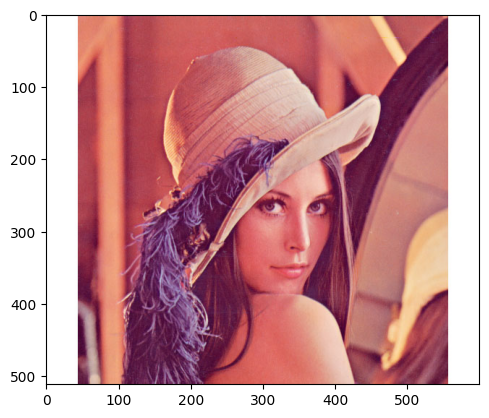

In [5]:
img = Image.open('lenna.jpg')
pixels = img.load()
plt.imshow(img)

In [6]:
filter1 = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]


filter2 = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]


filter3 = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]


filter4 = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]


filter5 = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]

filter6 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

filter7 = [
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
]

In [7]:
#mult every element of a color intensity matrix by corresponding element of filter matrix and sum up the result 
def convolution(img, kernel):
  return np.sum(np.multiply(img, kernel))

In [8]:
def sum_filter(filter):
  '''get the sum of all values in kernel'''
  return np.sum(filter) or 1
  
def apply_filter(img, filter):
  picture = img.copy()
  img_px_inplace = picture.load()                                  #careful - its inplace of the img you load
  kernel_start = floor(len(filter)/2)
  kernel_end = ceil(len(filter)/2)
  filter_sum = sum_filter(filter)                                  #get a sum of all vals in filter
  clr_min, clr_max = 0, 255

  for row in range(kernel_start, picture.width - kernel_start):     #go by cols
    for col in range(kernel_start, picture.height - kernel_start):  #go by rows
      y_R, y_G, y_B = [], [], []
      for kernel_row in range(-kernel_start, kernel_end):           #go through filter window from pixel-kernel side to pixel+kernel side. rows
        x_R, x_G, x_B = [], [], []
        for kernel_col in range (-kernel_start, kernel_end):        #cols. and aapend r g b values
          r, g, b = img_px_inplace[row+kernel_row, col+kernel_col]  #get color values
          x_R.append(r)
          x_G.append(g)
          x_B.append(b)
        y_R.append(x_R)
        y_G.append(x_G)
        y_B.append(x_B)
                                                                    #can't convert float64 using int() or // so use round(or astype) with no arg
      r_px = round(convolution(y_R, filter)/filter_sum)             #get element-wise filter * taken by filter pxls            
      g_px = round(convolution(y_G, filter)/filter_sum)             #color values by filter from img
      b_px = round(convolution(y_B, filter)/filter_sum)             #divided sum of elements in filter size

      r = np.clip(r_px, clr_min, clr_max)      
      g = np.clip(g_px, clr_min, clr_max)
      b = np.clip(b_px, clr_min, clr_max)
      img_px_inplace[row, col] = (r,g,b)
  return picture


filter 1


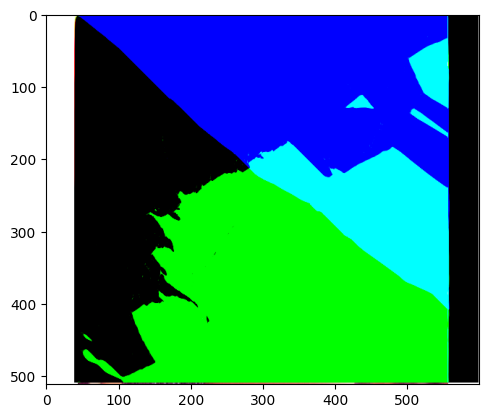

filter 2


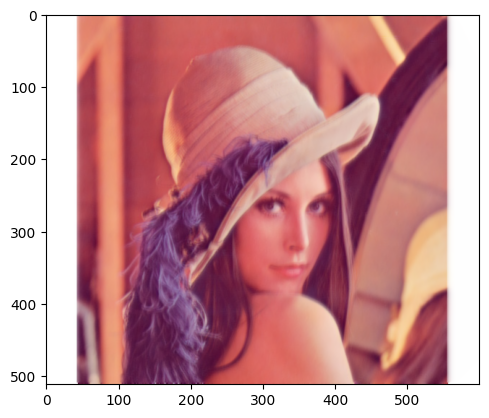

filter 3


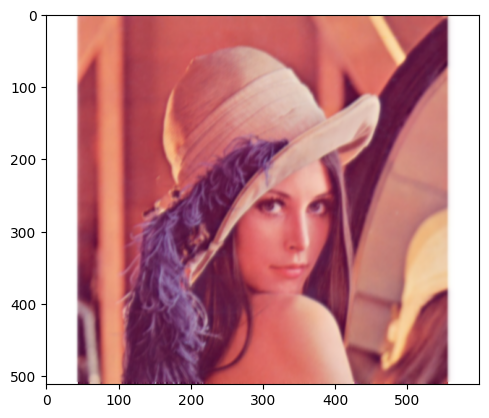

filter 4


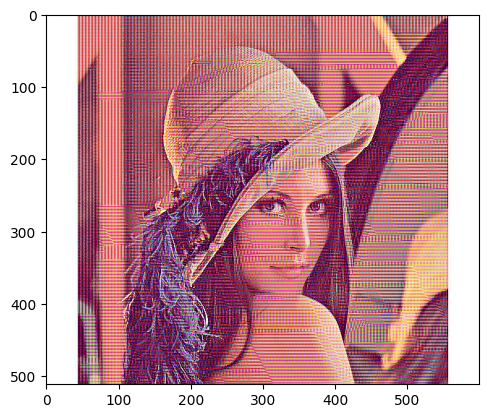

filter 5


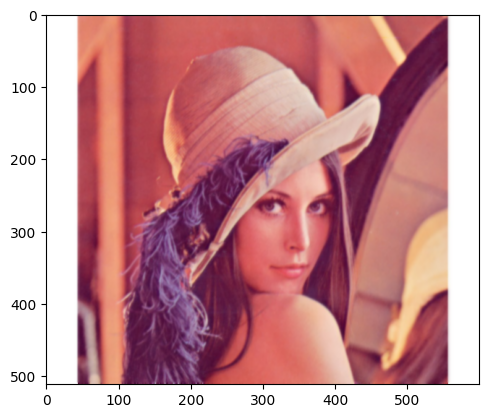

filter 6


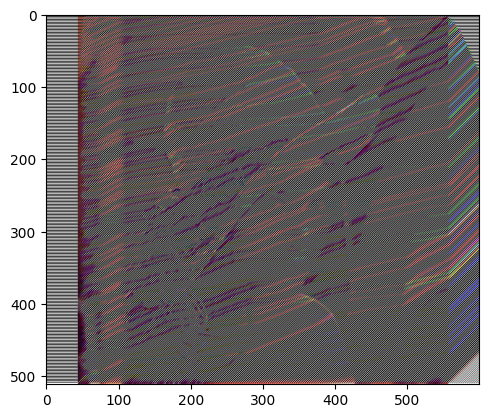

filter 7


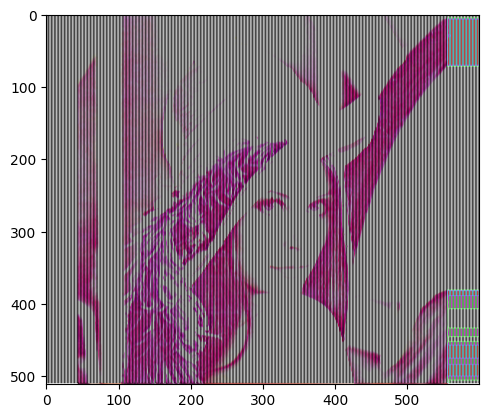

In [11]:
i = 0
for fil in [filter1,filter2,filter3,filter4,filter5,filter6,filter7]:
  i+=1
  print('filter',i)
  new_img = apply_filter(img, fil)
  plt.imshow(new_img)
  plt.show()